In [1]:
import yellowbrick as yb

In [2]:
from yellowbrick.features.manifold import Manifold

In [3]:
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.importances import FeatureImportances

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
%matplotlib inline

In [5]:
import sys
sys.path.append('./lib')
from airbnb_modeling import detect_feature_importance, scale_data, normalize_data, eval_metrics, plot_residuals, plot_predictions
from parse_methods import parse_columns
from airbnb_modeling import detect_interactions, add_interactions, map_variable, plot_rmse_instances,plot_rmse_features, plot_accuracy_instances

C:\Users\sanka\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-06-03_V1.csv',low_memory=False)
listings = listings.drop(listings.index[4323:4325])
listings.index = [i for i in range(len(listings))]

In [7]:
listings

description-Topic0 description-Topic1  description-Topic2  \
0                   0.0               0.32                0.00   
1                   0.0                0.0                0.00   
2                  0.12                0.0                0.00   
3                  0.28               0.12                0.00   
4                   0.0               0.17                0.00   
5                   0.0                0.0                0.00   
6                   0.0                0.1                0.00   
7                   0.0               0.04                0.00   
8                  0.28                0.0                0.00   
9                   0.0                0.0                0.00   
10                  0.0                0.0                0.00   
11                  0.0                0.0                0.00   
12                  0.0                0.0                0.00   
13                  0.0               0.09                0.00   
14                  0.0                0.0                0.00   
15                  0.0                0.0                0.00   
16                 0.06                0.0                0.00   
17                  0.0                0.0                0.00   
18                 0.27               0.09                0.00   
19                  0.0               0.17                0.00   
20                 0.05                0.0                0.00   
21                  0.0                0.0                0.07   
22                  0.0               0.07                0.00   
23                  0.0               0.12                0.00   
24                 0.01               0.01                0.01   
25                  0.0                0.0                0.00   
26                  0.0                0.0                0.00   
27                 0.14                0.0                0.00   
28                  0.0                0.0                0.00   
29                  0.0                0.0                0.00   
...                 ...                ...                 ...   
5721               0.01               0.01                0.01   
5722               0.04               0.11                0.00   
5723                0.0               0.02                0.00   
5724                0.0                0.0                0.00   
5725                0.0                0.0                0.00   
5726               0.38                0.0                0.18   
5727                0.0                0.0                0.09   
5728                0.0                0.0                0.19   
5729               0.05               0.05                0.05   
5730                0.0                0.0                0.00   
5731                0.0                0.0                0.00   
5732                0.0               0.11                0.00   
5733               0.41                0.0                0.00   
5734                0.0                0.0                0.00   
5735                0.0               0.12                0.00   
5736               0.14                0.0                0.00   
5737                0.0                0.0                0.00   
5738               0.05                0.0                0.00   
5739                0.0                0.0                0.00   
5740                0.0                0.0                0.25   
5741                0.0               0.13                0.00   
5742               0.05               0.03                0.00   
5743               0.21                0.0                0.00   
5744                0.0               0.13                0.00   
5745                0.0                0.0                0.00   
5746                0.0               0.24                0.00   
5747                0.0                0.0                0.00   
5748                0.0                0.0                0.00   
5749                0.0                0.0   

In [8]:
listings.columns[200:]

Index([u'has_Doorman', u'has_Pool', u'has_Pets_Allowed',
       u'has_Wheelchair_Accessible', u'has_First_Aid_Kit', u'has_Dog(s)',
       u'has_Wireless_Internet', u'has_Cable_TV',
       u'has_Laptop_Friendly_Workspace', u'has_Breakfast',
       u'has_Smoking_Allowed', u'has_Cat(s)', u'has_24-Hour_Check-in',
       u'uses_phone', u'uses_linkedin', u'uses_email', u'uses_manual_online',
       u'uses_facebook', u'uses_amex', u'uses_sent_id', u'uses_jumio',
       u'uses_google', u'uses_manual_offline', u'uses_kba', u'uses_reviews',
       u'distance_from_ocean', u'zipcode_cleansed', u'host_response_time_enc',
       u'calendar_updated_enc', u'bed_type_enc', u'jurisdiction_names_enc',
       u'zipcode_enc', u'cancellation_policy_enc', u'zipcode_cleansed_enc',
       u'host_is_superhost_bin', u'is_location_exact_bin',
       u'host_has_profile_pic_bin', u'host_identity_verified_bin',
       u'instant_bookable_bin', u'require_guest_profile_picture_bin',
       u'require_guest_phone_verific

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [10]:
X = listings.select_dtypes(include=['int64', 'float64'])

In [11]:
target = X['price_y']

In [14]:
X = X.drop('price_y', axis = 1)

In [16]:
X.columns

Index([u'description-Topic2', u'description-Topic3', u'description-Topic7',
       u'description-Topic8', u'description-Topic9', u'description-Topic14',
       u'description-Topic16', u'description-Topic19', u'host_id',
       u'host_response_rate',
       ...
       u'distance_to_closest_park_km', u'closest_park_index',
       u'closest_park_full_name_enc', u'park_type_enc',
       u'all_events_within_1_km_at_min_distance_bin',
       u'all_events_within_3_km_at_min_distance_bin',
       u'all_events_within_5_km_at_min_distance_bin', u'days_since_host',
       u'calendar_updated_numeric', u'amenity_level_enc'],
      dtype='object', length=179)

In [20]:
excluded = ['reviews_per_month', 'hol_skew_of_price', 'zipcode', 'medium_url', 'host_neighbourhood', 'require_guest_profile_picture', 'host_acceptance_rate',
 'country_code', 'review_scores_cleanliness', 'property_type', 'park_index', 'Unnamed: 0', 'closest_park_index', 'host_since', 'latitude',
 'closest_park_full_name', 'security_deposit', 'monthly_price', 'all_events_within_5_km_at_min_distance', 'weekly_price', 'host_verifications',
 'review_scores_value', 'host_id', 'name', 'notes', 'calendar_updated', 'summary', 'thumbnail_url', 'host_name', 'host_has_profile_pic',
 'listing_url', 'neighbourhood_cleansed', 'street', 'neighborhood_overview', 'neighbourhood', 'space', 'price_x', 'access', 'state', 'amenities_set',
 'square_feet', 'all_events_within_1_km_at_min_distance', 'host_url', 'interaction', 'license', 'country', 'requires_license',
 'host_is_superhost', 'xl_picture_url', 'scrape_id', 'host_total_listings_count', 'amenity_level', 'review_scores_accuracy', 'all_events_within_3_km_at_min_distance',
 'transit', 'review_scores_communication', 'host_location', 'market', 'city', 'host_identity_verified', 'amenities', 'zipcode_cleansed',
 'review_scores_location', 'jurisdiction_names', 'host_thumbnail_url', 'instant_bookable', 'experiences_offered', 'host_about', 'last_review',
 'zipcode_enc', 'longitude', 'cleaning_fee', 'last_scraped', 'review_scores_rating', 'review_scores_checkin', 'first_review', 'cancellation_policy',
 'park_type', 'is_location_exact', 'id', 'id_2', 'events_within_16_km', 'picture_url', 'calendar_last_scraped', 'id_1', 'host_listings_count',
 'maximum_nights', 'house_rules', 'listing_id_y', 'listing_id_x', 'description', 'host_picture_url', 'smart_location', 'host_response_rate',
 'extra_prople', 'closest_park', 'neighbourhood_group_cleansed', 'bed_type', 'host_response_time', 'has_availability', 'require_guest_phone_verification',
 'distance_of_closest_park_y', 'room_type']




In [22]:
X = X.T
X = X[X.isnull().T.sum() < .5*len(X)]
X = X.T

In [25]:
X.dropna()

description-Topic2  description-Topic3  description-Topic7  \
0                   0.00                0.00                0.00   
1                   0.00                0.00                0.00   
2                   0.00                0.00                0.00   
3                   0.00                0.00                0.00   
4                   0.00                0.00                0.00   
5                   0.00                0.00                0.00   
6                   0.00                0.00                0.00   
7                   0.00                0.00                0.00   
8                   0.00                0.06                0.00   
9                   0.00                0.00                0.00   
10                  0.00                0.00                0.00   
11                  0.00                0.00                0.00   
12                  0.00                0.00                0.00   
13                  0.00                0.00                0.00   
14                  0.00                0.00                0.00   
15                  0.00                0.04                0.00   
16                  0.00                0.06                0.00   
17                  0.00                0.00                0.00   
18                  0.00                0.00                0.00   
19                  0.00                0.00                0.00   
20                  0.00                0.04                0.00   
21                  0.07                0.00                0.00   
22                  0.00                0.12                0.00   
23                  0.00                0.00                0.00   
25                  0.00                0.00                0.00   
26                  0.00                0.04                0.00   
27                  0.00                0.10                0.00   
28                  0.00                0.00                0.00   
29                  0.00                0.00                0.00   
30                  0.00                0.00                0.00   
...                  ...                 ...                 ...   
5721                0.01                0.01                0.01   
5722                0.00                0.30                0.02   
5723                0.00                0.35                0.00   
5724                0.00                0.14                0.00   
5725                0.00                0.00                0.00   
5726                0.18                0.00                0.00   
5727                0.09                0.00                0.00   
5728                0.19                0.09                0.00   
5729                0.05                0.05                0.05   
5730                0.00                0.00                0.00   
5731                0.00                0.00                0.00   
5732                0.00                0.00                0.00   
5733                0.00                0.00                0.00   
5734                0.00                0.00                0.00   
5735                0.00                0.00                0.00   
5736                0.00                0.52                0.00   
5737                0.00                0.00                0.00   
5738                0.00                0.08                0.00   
5739                0.00                0.00                0.00   
5740                0.25                0.00                0.00   
5741                0.00                0.07                0.00   
5742                0.00                0.15                0.01   
5743                0.00                0.17                0.00   
5744                0.00                0.00                0.00   
5745                0.00                0.00                0.00   
5746                0.00                0.06                0.00   
5747                0.00                0.00                0.

C:\Users\sanka\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


AttributeError: 'MDS' object has no attribute 'transform'

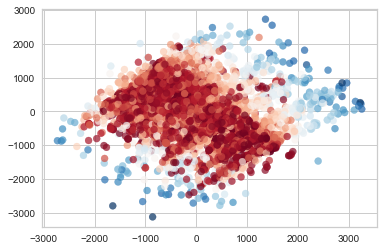

In [27]:
visualizer = Manifold(manifold='mds', target='continuous')
j = X[[i for i in X.columns if i not in excluded]]
j['price_y'] = target
j = j.dropna()
target_two = j['price_y']
j = j.drop('price_y', axis = 1)

visualizer.fit_transform(j, target_two)
visualizer.poof()

In [28]:
model = Pipeline([
("selectk", SelectKBest(k=3, score_func=f_classif)),
("viz", Manifold(manifold='mds', target='continuous')),
])

C:\Users\sanka\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


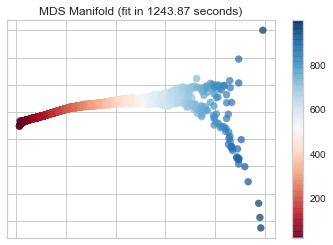

In [29]:
model.fit(j, target_two)
model.named_steps['viz'].poof()

In [8]:
listings_original = pd.read_csv('datasources/inside_airbnb/listings.csv')

In [9]:
listings_original

id                            listing_url       scrape_id  \
0     11204286  https://www.airbnb.com/rooms/11204286  20160706203047   
1      7972006   https://www.airbnb.com/rooms/7972006  20160706203047   
2      7727710   https://www.airbnb.com/rooms/7727710  20160706203047   
3     13124681  https://www.airbnb.com/rooms/13124681  20160706203047   
4      3469225   https://www.airbnb.com/rooms/3469225  20160706203047   
5       877473    https://www.airbnb.com/rooms/877473  20160706203047   
6      3124507   https://www.airbnb.com/rooms/3124507  20160706203047   
7      3432507   https://www.airbnb.com/rooms/3432507  20160706203047   
8      3249729   https://www.airbnb.com/rooms/3249729  20160706203047   
9     11756336  https://www.airbnb.com/rooms/11756336  20160706203047   
10    12173670  https://www.airbnb.com/rooms/12173670  20160706203047   
11    13157364  https://www.airbnb.com/rooms/13157364  20160706203047   
12     9756570   https://www.airbnb.com/rooms/9756570  20160706203047   
13    10687910  https://www.airbnb.com/rooms/10687910  20160706203047   
14     7938260   https://www.airbnb.com/rooms/7938260  20160706203047   
15    10779932  https://www.airbnb.com/rooms/10779932  20160706203047   
16    13301630  https://www.airbnb.com/rooms/13301630  20160706203047   
17     5285136   https://www.airbnb.com/rooms/5285136  20160706203047   
18    13313236  https://www.airbnb.com/rooms/13313236  20160706203047   
19     7663518   https://www.airbnb.com/rooms/7663518  20160706203047   
20     5077385   https://www.airbnb.com/rooms/5077385  20160706203047   
21     7113838   https://www.airbnb.com/rooms/7113838  20160706203047   
22     8555262   https://www.airbnb.com/rooms/8555262  20160706203047   
23    13472856  https://www.airbnb.com/rooms/13472856  20160706203047   
24     4997701   https://www.airbnb.com/rooms/4997701  20160706203047   
25     6098460   https://www.airbnb.com/rooms/6098460  20160706203047   
26    13562988  https://www.airbnb.com/rooms/13562988  20160706203047   
27    10284248  https://www.airbnb.com/rooms/10284248  20160706203047   
28    13693167  https://www.airbnb.com/rooms/13693167  20160706203047   
29    12988363  https://www.airbnb.com/rooms/12988363  20160706203047   
...        ...                                    ...             ...   
6578  13765978  https://www.airbnb.com/rooms/13765978  20160706203047   
6579  13637335  https://www.airbnb.com/rooms/13637335  20160706203047   
6580   7462953   https://www.airbnb.com/rooms/7462953  20160706203047   
6581  13816897  https://www.airbnb.com/rooms/13816897  20160706203047   
6582    181308    https://www.airbnb.com/rooms/181308  20160706203047   
6583  12485414  https://www.airbnb.com/rooms/12485414  20160706203047   
6584  13710734  https://www.airbnb.com/rooms/13710734  20160706203047   
6585  13868104  https://www.airbnb.com/rooms/13868104  20160706203047   
6586  13526039  https://www.airbnb.com/rooms/13526039  20160706203047   
6587  13689250  https://www.airbnb.com/rooms/13689250  20160706203047   
6588  13495353  https://www.airbnb.com/rooms/13495353  20160706203047   
6589  10328997  https://www.airbnb.com/rooms/10328997  20160706203047   
6590   9710574   https://www.airbnb.com/rooms/9710574  20160706203047   
6591  13448725  https://www.airbnb.com/rooms/13448725  20160706203047   
6592  13864897  https://www.airbnb.com/rooms/13864897  20160706203047   
6593  13859950  https://www.airbnb.com/rooms/13859950  20160706203047   
6594  11375621  https://www.airbnb.com/rooms/11375621  20160706203047   
6595  13443354  https://www.airbnb.com/rooms/13443354  20160706203047   
6596  13670544  https://www.airbnb.com/rooms/13670544  20160706203047   
6597   8271640   https://www.airbnb.com/rooms/8271640  20160706203047   
6598  13411765  https://www.airbnb.com/rooms/13411765  20160706203047   
6599  13377361  https://www.airbnb.com/rooms/13377361  20160706203047   
6600  13466129  https://www.airbnb.com/rooms/13466129  20160706203047 

In [10]:
listings_original.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

In [14]:
listings['accommodates'].unique()

array([  2.,   4.,  10.,   8.,   3.,   6.,   7.,   1.,   5.,  14.,  13.,
        12.,   9.,  16.,  15.,  11.,  20.,  21.,  18.])

In [18]:
P = []

P_dict = {}

for w in listings['accommodates'].unique():
    m = listings[listings['accommodates'] == w]['price_y'].mean()
    P.append((w, m))
    P_dict[w] = m

In [19]:
sorted(P, key = lambda x: x[0])

[(1.0, 67.20287887803275),
 (2.0, 102.63573850082923),
 (3.0, 139.7902765403645),
 (4.0, 197.47864729992563),
 (5.0, 248.4196882317234),
 (6.0, 287.4078702007993),
 (7.0, 353.45880168172044),
 (8.0, 395.7755033689963),
 (9.0, 380.40935927495315),
 (10.0, 462.06946962067485),
 (11.0, 319.1790788990671),
 (12.0, 473.36869240529813),
 (13.0, 558.4395909510552),
 (14.0, 543.296489642119),
 (15.0, 509.1491813235576),
 (16.0, 473.5725379750826),
 (18.0, 395.2102793397203),
 (20.0, 196.46728812413986),
 (21.0, 196.46728812413969)]

In [20]:
P_dict

{1.0: 67.20287887803275,
 2.0: 102.63573850082923,
 3.0: 139.7902765403645,
 4.0: 197.47864729992563,
 5.0: 248.4196882317234,
 6.0: 287.4078702007993,
 7.0: 353.45880168172044,
 8.0: 395.7755033689963,
 9.0: 380.40935927495315,
 10.0: 462.06946962067485,
 11.0: 319.1790788990671,
 12.0: 473.36869240529813,
 13.0: 558.4395909510552,
 14.0: 543.296489642119,
 15.0: 509.1491813235576,
 16.0: 473.5725379750826,
 18.0: 395.2102793397203,
 20.0: 196.46728812413986,
 21.0: 196.46728812413969}

In [21]:
np.corrcoef(P_dict.keys(), P_dict.values())

array([[ 1.        ,  0.47638771],
       [ 0.47638771,  1.        ]])

In [22]:
import matplotlib.pyplot as plt

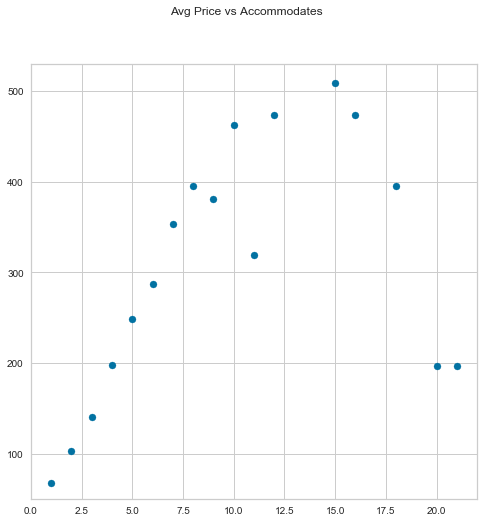

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(P_dict.keys(), P_dict.values())
ax.set_xlim((0, 22))
ax.set_ylim((50, 530))
fig.suptitle('Avg Price vs Accommodates')
ax.grid(True)

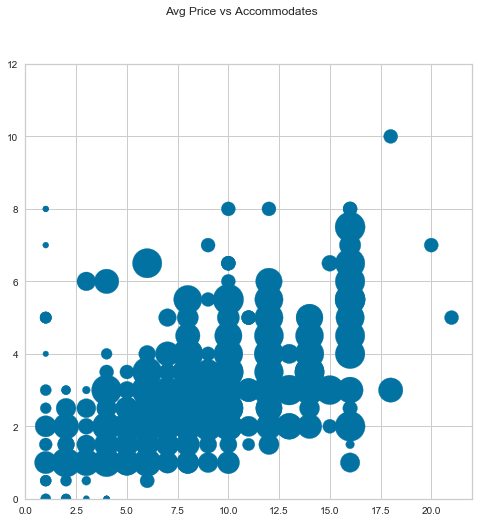

In [24]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(listings['accommodates'], listings['bathrooms'], s = listings['price_y'])
ax.set_xlim((0, 22))
ax.set_ylim((0, 12))
fig.suptitle('Avg Price vs Accommodates')
ax.grid(True)